In [22]:
import wave
import json
import librosa
import csv
import numpy as np
from pywt import wavedec
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [24]:
model_uri = '../modelh5/model_lstm_nontuning.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 101, 64)           16896     
                                                                 
 dense_4 (Dense)             (None, 101, 32)           2080      
                                                                 
 flatten_1 (Flatten)         (None, 3232)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                206912    
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 228133 (891.14 KB)
Trainable params: 228

In [25]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()
file = open('testing.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)



In [26]:
dataset_path = '../data/testing_10/'

In [27]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                to_append = f'{file_path}'
                # print(file_path)
                y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
                coeffs = wavedec(y, 'db5', level=10)
                cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
                mfcc = librosa.feature.mfcc(y=cD7, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
                rms = librosa.feature.rms(y=cD7)[0]
                cqt = np.abs(librosa.cqt(y=cD7, sr=sr, n_bins=60)) 
                combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
                to_append = f'{file_path}'
                for e in combined_features:
                    to_append += f' {np.mean(e.T, axis=0)}'
                to_append += f' {semantic_label}'
                file = open('testing.csv', 'a', newline='')
                with file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())





Processing: MVP


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=146
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=146
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=73
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=37
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=19
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input si


Processing: MS


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=190
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=190
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=95
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=135
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=135
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input


Processing: N


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=169
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=169
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=172
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=172
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=86
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for inpu


Processing: MR


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=148
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=148
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=74
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=143
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=143
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for inpu


Processing: AS


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=173
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=173
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=87
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=191
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=191
  warnings.warn(


In [28]:
data = pd.read_csv('./testing.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/testing_10/MVP/New_MVP_135.wav,-137.253082,2.447073,-6.376841,-2.597306,-7.023592,-10.646538,2.280750,-2.674198,-6.583298,...,0.067103,0.070366,0.080285,0.079783,0.064649,0.038663,0.012676,0.031471,0.037672,MVP
1,../data/testing_10/MVP/New_MVP_192.wav,68.907555,30.225883,-15.003351,7.072997,8.614073,5.022683,3.960662,-1.924218,-15.599853,...,0.437940,0.526646,0.680405,0.544483,0.147355,0.281417,0.491576,0.346765,0.210420,MVP
2,../data/testing_10/MVP/New_MVP_179.wav,-76.691322,35.450562,-18.970543,4.736041,1.798681,-9.746999,-5.955236,7.342784,3.009608,...,0.202301,0.161948,0.165963,0.165468,0.120500,0.050101,0.033476,0.049714,0.083135,MVP
3,../data/testing_10/MVP/New_MVP_165.wav,-146.272949,8.437213,0.170601,5.966011,3.693152,-0.015332,-3.825775,6.039351,-0.972052,...,0.045637,0.048536,0.050737,0.048736,0.042293,0.029665,0.021297,0.032929,0.034120,MVP
4,../data/testing_10/MVP/New_MVP_024.wav,58.925289,7.674634,-15.471750,9.463516,-9.600967,7.486928,-0.525319,5.234666,2.167872,...,0.040418,0.118871,0.304143,0.343277,0.349473,0.571791,0.594793,0.438275,0.335668,MVP


In [29]:
X = data.drop(['label', 'filename'], axis=1)
y = data.iloc[:, -1]

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = tf.keras.models.load_model(model_uri)
pred = model.predict(X)
hasil = []
class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
# class_labels = ['MVP', 'MS', 'N', 'MR', 'AS']
for i in pred:
    # hasil.append(np.argmax(i))
    print('===')
    print(i)
    cek = np.argmax(i)
    print(f'Actual class: {cek}')
    print(f'Predicted class: {class_labels[cek]}')
    print('===')
    hasil.append(class_labels[cek])
y_p = np.argmax(pred, axis=1)


4/4 [==============================] - 0s 8ms/step
===
[1.1441447e-02 1.4461854e-02 3.3149446e-04 9.7374380e-01 2.1366415e-05]
Actual class: 3
Predicted class: MVP
===
===
[4.7143653e-01 4.6610413e-03 8.8082524e-03 5.1502520e-01 6.9055619e-05]
Actual class: 3
Predicted class: MVP
===
===
[3.8109619e-02 9.4330084e-01 1.9661351e-03 1.6582672e-02 4.0724059e-05]
Actual class: 1
Predicted class: MR
===
===
[1.2942078e-04 1.2798265e-03 3.7688602e-04 9.9820828e-01 5.5640176e-06]
Actual class: 3
Predicted class: MVP
===
===
[6.5275171e-06 2.3500474e-04 1.0986000e-06 9.9953347e-01 2.2393216e-04]
Actual class: 3
Predicted class: MVP
===
===
[7.4791249e-05 2.0921549e-02 2.0221736e-04 9.7878391e-01 1.7495206e-05]
Actual class: 3
Predicted class: MVP
===
===
[0.00369316 0.02740614 0.00104447 0.9646916  0.00316462]
Actual class: 3
Predicted class: MVP
===
===
[1.5430596e-05 1.6201537e-05 2.1173491e-05 9.9992996e-01 1.7132612e-05]
Actual class: 3
Predicted class: MVP
===
===
[1.8149220e-04 2.2206258e

In [31]:
cm = confusion_matrix(y, hasil)
cm

array([[17,  2,  0,  1,  0],
       [ 0, 17,  0,  2,  1],
       [ 1,  2, 12,  5,  0],
       [ 0,  1,  0, 19,  0],
       [ 0,  2,  0,  0, 18]])

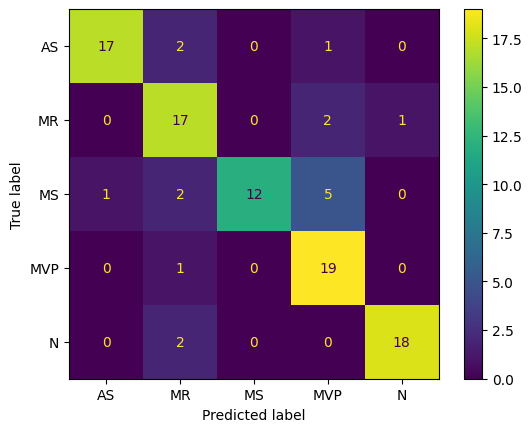

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [33]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [34]:
print("TNR :" , TNR)
print("TPR :" , TPR)
print("FPR :" , FPR)
print("FNR :" , FNR)
print("ACC :" , ACC)
print("PPV :" , PPV)
print("NPV :" , NPV)
print("FDR :" , FDR)


TNR : [0.9875 0.9125 1.     0.9    0.9875]
TPR : [0.85 0.85 0.6  0.95 0.9 ]
FPR : [0.0125 0.0875 0.     0.1    0.0125]
FNR : [0.15 0.15 0.4  0.05 0.1 ]
ACC : [0.96 0.9  0.92 0.91 0.97]
PPV : [0.94444444 0.70833333 1.         0.7037037  0.94736842]
NPV : [0.96341463 0.96052632 0.90909091 0.98630137 0.97530864]
FDR : [0.05555556 0.29166667 0.         0.2962963  0.05263158]
